In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [ ]:
img_path = "F:\new_project\industrial_crack_detection\images\input\metal-texture-with-dust-scratches-and-cracks-photo.jpg"
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"❌ Image not found at: {img_path}")

show(img, "Original Image")


<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\RKstore\AppData\Local\Temp\ipykernel_15944\3118817055.py:1: SyntaxWarning: invalid escape sequence '\i'
  img_path = "F:\new_project\industrial_crack_detection\images\input\metal-texture-with-dust-scratches-and-cracks-photo.jpg"


FileNotFoundError: ❌ Image not found at: F:
ew_project\industrial_crack_detection\images\input\metal-texture-with-dust-scratches-and-cracks-photo.jpg

In [3]:
def show(img,title="", cmap="gray"):
    plt.figure(figsize=(6,6))
    plt.imshow(img,cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

    

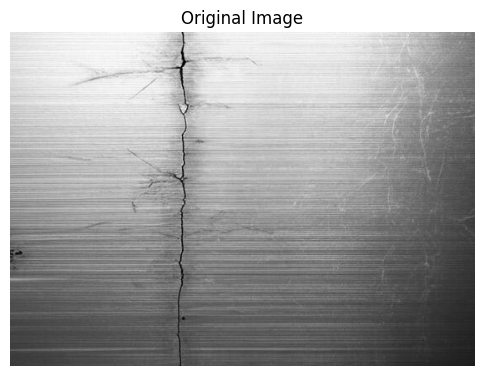

In [11]:
img_path = r"F:\new_project\industrial_crack_detection\images\input\metal-texture-with-dust-scratches-and-cracks-photo.jpg"

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"❌ Image not found at: {img_path}")

show(img, "Original Image")

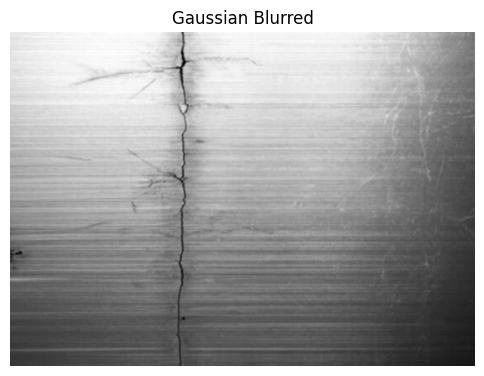

In [20]:
blurred = cv2.GaussianBlur(img,(3,3),0)
show(blurred,"Gaussian Blurred")



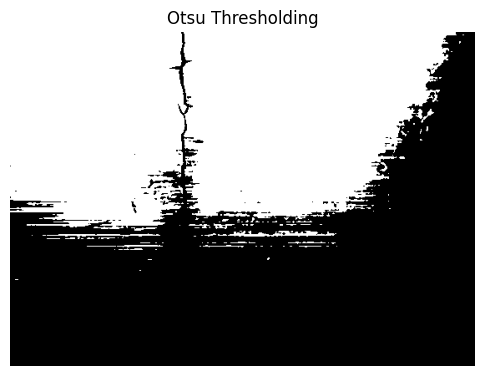

In [24]:
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(binary, "Otsu Thresholding")

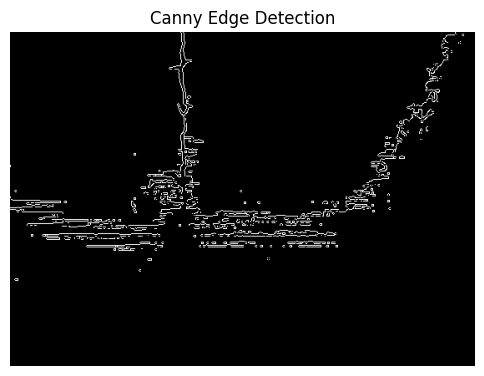

In [33]:
edges  =cv2.Canny(binary,50,150)
show(edges,"Canny Edge Detection")


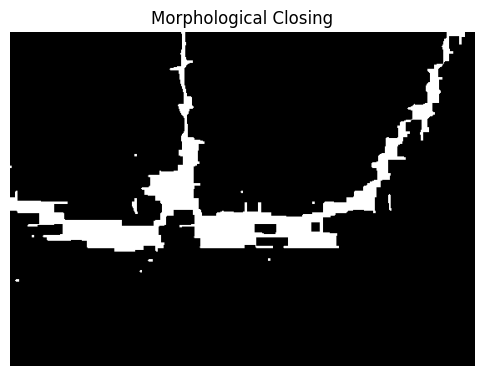

In [45]:

kernel = np.ones((10,10),np.uint8)
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
show(closed, "Morphological Closing")


In [48]:
lines = cv2.HoughLinesP(closed, 1, np.pi / 180, threshold=100, minLineLength=30, maxLineGap=5)
result = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

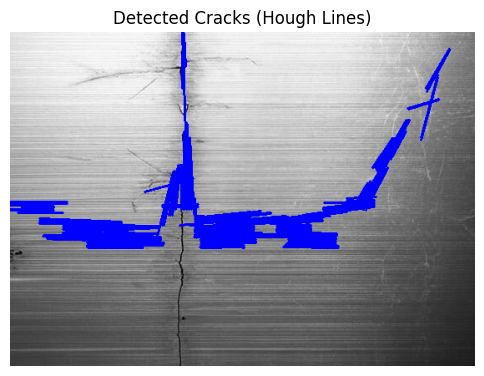

In [49]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)

show(result, "Detected Cracks (Hough Lines)", cmap=None)

In [54]:

cv2.imwrite(r"F:\new_project\industrial_crack_detection\images\output\detected_cracks.jpg", result)

True